In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [3]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [4]:
# We can view all of the classes that automap found

Base.classes.keys()


['measurement', 'station']

In [5]:
# Save references to each table

Measurement = Base.classes.measurement
Station = Base.classes.station


In [6]:
# Create our session (link) from Python to the DB

session = Session(engine)


# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


date = session.query(Measurement.date).order_by((Measurement.date.desc())).first()[0]


prev_year = dt.datetime.strptime(date , '%Y-%m-%d') - dt.timedelta(days=365)


last_12_months = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()



In [11]:

#Save query as pandas dataframe

prcp_date_df = pd.DataFrame(last_12_months,columns=['date','precipitation'])
prcp_date_df.head()



,date,precipitation
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


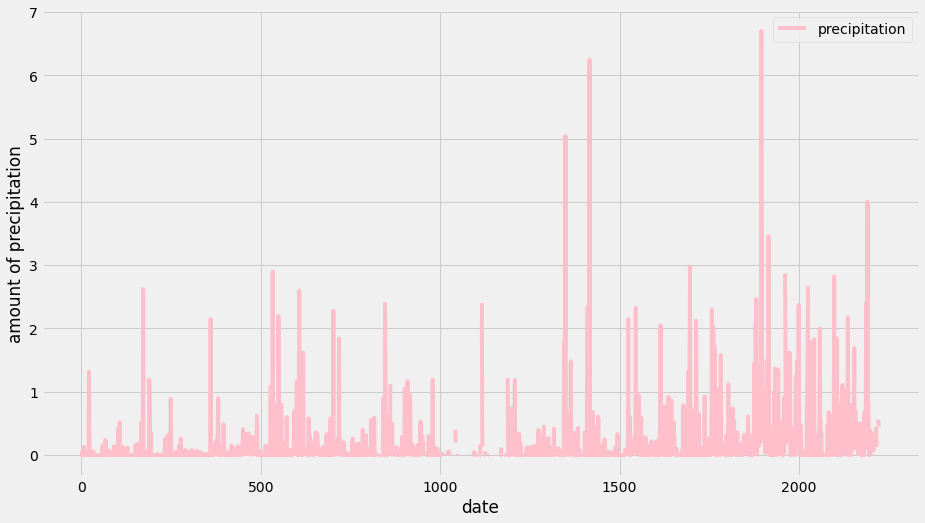

In [12]:

# Use Pandas Plotting with Matplotlib to plot the data

prcp_chart = prcp_date_df.plot(color = 'pink',legend = True, figsize = (14,8))

plt.ylabel("amount of precipitation")
plt.xlabel("date")
plt.show()

In [13]:

# Use Pandas to calcualte the summary statistics for the precipitation data

prcp_date_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [14]:
# Design a query to show how many stations are available in this dataset?

session.query(Station.station).count()


9

In [15]:
Measurement.station

In [16]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.



most_active = session.query(Measurement.station,func.count(Measurement.station))\
                                     .group_by(Measurement.station)
                                    

most_active = pd.DataFrame(most_active,columns=['station', 'count'])

most_active






,station,count
0,USC00511918,1979
1,USC00513117,2709
2,USC00514830,2202
3,USC00516128,2612
4,USC00517948,1372
5,USC00518838,511
6,USC00519281,2772
7,USC00519397,2724
8,USC00519523,2669


In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

temp = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
filter(Measurement.station == "USC00519281")


temp_df = pd.DataFrame(temp,columns=['min', 'max', 'avg'])

temp_df




,min,max,avg
0,54.0,85.0,71.663781


In [34]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram




highest_station = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= prev_year).all()



highest_df = pd.DataFrame(highest_station, columns=['temp observation'])

highest_df.head()

,temp observation
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb560d6820>]],
      dtype=object)

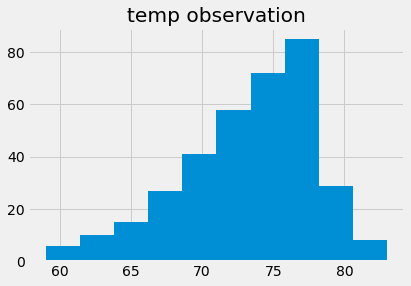

In [43]:
highest_df.hist(column = None, grid = True)
